# Breast Cancer Classification using KNN


# 1. Importing Necessary Libraries

In this cell, we import essential Python libraries used for data analysis, visualization, and model development.

-- numpy and pandas handle data and numerical computations.

-- matplotlib and seaborn are used for visualizations.

-- scikit-learn provides tools for machine learning, such as splitting data and applying the KNN algorithm.

In [1]:
import numpy as np                     # For numerical operations
import pandas as pd                    # For data manipulation
import matplotlib.pyplot as plt        # For plotting
import seaborn as sns                  # For visualization

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Display plots inline
%matplotlib inline


# 2. Loading the Dataset

This cell loads the Breast Cancer dataset from a CSV file.
It displays the first few rows to get an overview of the data structure, column names, and general content.

In [2]:
# Load dataset from CSV
df = pd.read_csv("breast-cancer-wisconsin-data_data.csv")

# Display first few rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Data Information and Exploration

The .info() method summarizes the dataset:
Number of rows and columns
Data types of each column
Non-null counts, which help check for missing data.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 4. Data Cleaning

The columns ‘id’ and ‘Unnamed: 32’ do not contribute to prediction.
They are dropped to make the dataset clean and easier to process.

In [4]:
# Drop unnecessary columns 'id' and 'Unnamed: 32'
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Confirm shape after dropping columns
df.shape


(569, 31)

# 5. Encoding Target Variable

The target column diagnosis is categorical.
To perform machine learning computations, we map:

Malignant (‘M’) → 1

Benign (‘B’) → 0
This converts the diagnosis column into a numerical format.

In [5]:
# Map 'M' (Malignant) to 1 and 'B' (Benign) to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display value counts
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

# 6. Visualizing Relationships

Visualizations help understand whether classes (Benign, Malignant) can be separated by certain features.
Here, we use scatter plots to see distribution patterns for different feature pairs.

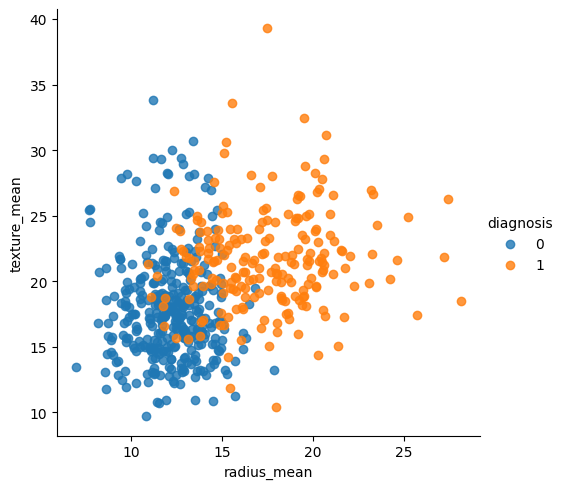

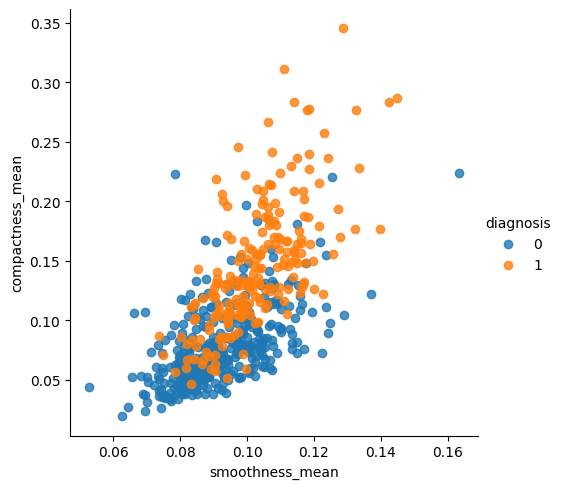

In [6]:
# Relationship between radius_mean and texture_mean
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, fit_reg=False)

# Relationship between smoothness_mean and compactness_mean
sns.lmplot(x='smoothness_mean', y='compactness_mean', hue='diagnosis', data=df, fit_reg=False)
plt.show()


# 7. Preparing Data for Model

The dataset is divided into:

X: all input features (except the target column)

y: output target (diagnosis)

In [7]:
X = df.iloc[:, 1:].values    # Features
y = df['diagnosis'].values   # Target

print(X.shape, y.shape)


(569, 30) (569,)


# 8. Train-Test Split

We split the data into training and test sets:

67% for training

33% for testing
The random_state ensures consistent results on every run.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (381, 30)
Testing set size: (188, 30)


# 9. KNN Model Training

Here, we create a K-Nearest Neighbors (KNN) classifier with 13 neighbors.
The model is trained using the training dataset.

In [9]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)


,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 10. Model Evaluation

The .score() method returns the model’s accuracy—
the proportion of correctly predicted samples on test data.

In [10]:
accuracy = knn.score(X_test, y_test)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.9627659574468085


# 11. Cross Validation to Optimize k

This section performs 10-fold cross-validation to test KNN performance across various values of k.
The goal is to find the optimal number of neighbors that minimizes misclassification error.
The final plot visualizes this relationship, helping identify the k value with best performance.

The optimal number of neighbors is 13


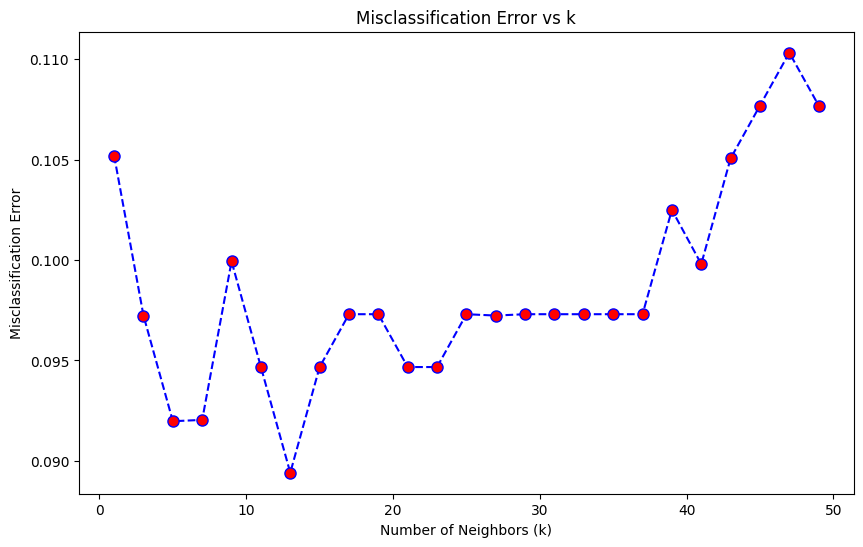

In [11]:
neighbors = list(range(1, 51, 2))
cv_scores = []

for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Compute misclassification error
MSE = [1 - x for x in cv_scores]

# Determine the optimal k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is", optimal_k)

# Plot MSE vs k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs k')
plt.show()


# 12. Final Accuracy with Optimal k

The model is retrained using the optimal number of neighbors.
The final accuracy gives the performance of the tuned KNN classifier.

In [12]:
# Train KNN with optimal k and test final model
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)
final_accuracy = final_knn.score(X_test, y_test)
print("Final model accuracy with k =", optimal_k, "is", final_accuracy)


Final model accuracy with k = 13 is 0.9627659574468085


# 13. Summary

**Cleaned and preprocessed the Breast Cancer dataset.**

**Visualized feature relationships to understand the separation between classes.**

**Built and trained a KNN model for classification.**

**Used cross-validation to determine the optimal k (13).**

**Achieved around 96% accuracy on the test dataset.**